In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
başlık = ['id','sehir','cinsiyet','yas','gelir','hastalık']
df = pd.read_csv('deneme_dataset.csv',header = 0,names = başlık)
data_set = df.copy()
data_set

,id,sehir,cinsiyet,yas,gelir,hastalık
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [3]:
data_set.head()

,id,sehir,cinsiyet,yas,gelir,hastalık
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
data_set.dtypes

id            int64
sehir        object
cinsiyet     object
yas           int64
gelir       float64
hastalık     object
dtype: object

In [5]:
data_set.gelir = data_set.gelir.astype(int)

In [6]:
data_set.dtypes

id           int64
sehir       object
cinsiyet    object
yas          int64
gelir        int32
hastalık    object
dtype: object

In [7]:
id       = data_set.id
sehir    = data_set.sehir
cinsiyet = data_set.cinsiyet
yas      = data_set.yas
gelir    = data_set.gelir
hastalık = data_set.hastalık

In [8]:
cinsiyet.value_counts()

Male      83800
Female    66200
Name: cinsiyet, dtype: int64

In [9]:
hastalık.value_counts()

No     137861
Yes     12139
Name: hastalık, dtype: int64

In [10]:
sehir.value_counts()

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: sehir, dtype: int64

In [11]:
ortalama_yas = yas.mean()
print('Yaş Ortalaması :',ortalama_yas)

Yaş Ortalaması : 44.9502


In [12]:
aylık_ortalama_gelir = round(gelir.mean()/12,2)
print('Aylık Ortalama Gelir :',aylık_ortalama_gelir)

Aylık Ortalama Gelir : 7604.4


In [13]:
yıllık_ortalama_gelir = round(gelir.mean(),1)
print('Senelik Ortalama Gelir :',yıllık_ortalama_gelir)

Senelik Ortalama Gelir : 91252.8


In [14]:
data_set.describe().T.drop('id')

,count,mean,std,min,25%,50%,75%,max
yas,150000.0,44.950200,11.572486,25.0,35.00,45.0,55.0,65.0
gelir,150000.0,91252.798273,24989.500948,-654.0,80867.75,93655.0,104519.0,177157.0


In [34]:
data_set[(gelir >= yıllık_ortalama_gelir)].head(10) 

,id,sehir,cinsiyet,yas,gelir,hastalık,aylık_gelir
8418,8419,Dallas,Male,50,91479,No,7623.2
19707,19708,New York City,Male,49,112226,No,9352.2
19708,19709,New York City,Male,42,110534,No,9211.2
19709,19710,New York City,Female,61,100665,No,8388.8
19710,19711,New York City,Female,58,98147,Yes,8178.9
19711,19712,New York City,Female,43,93100,No,7758.3
19713,19714,New York City,Male,38,120288,No,10024.0
19714,19715,New York City,Female,58,98844,No,8237.0
19715,19716,New York City,Female,47,92981,No,7748.4
19716,19717,New York City,Female,39,105036,No,8753.0


In [35]:
data_set[(gelir >= yıllık_ortalama_gelir) & (yas <= ortalama_yas)].head(10)

,id,sehir,cinsiyet,yas,gelir,hastalık,aylık_gelir
19708,19709,New York City,Male,42,110534,No,9211.2
19711,19712,New York City,Female,43,93100,No,7758.3
19713,19714,New York City,Male,38,120288,No,10024.0
19716,19717,New York City,Female,39,105036,No,8753.0
19718,19719,New York City,Female,44,97823,No,8151.9
19724,19725,New York City,Male,33,101792,No,8482.7
19725,19726,New York City,Female,26,97946,No,8162.2
19728,19729,New York City,Male,33,94370,Yes,7864.2
19732,19733,New York City,Male,29,110286,Yes,9190.5
19734,19735,New York City,Female,37,112233,No,9352.8


In [17]:
round(data_set.groupby('sehir').gelir.mean(),1)

sehir
Austin              90277.5
Boston              91554.6
Dallas              45252.2
Los Angeles         95264.2
Mountain View      135078.4
New York City       96857.1
San Diego          100756.2
Washington D.C.     70991.6
Name: gelir, dtype: float64

In [36]:
data_set[(yas >= 40) & (hastalık == 'No')][['cinsiyet','gelir']].head(10)

,cinsiyet,gelir
0,Male,40367
1,Male,45084
2,Male,52483
3,Male,40941
4,Male,50289
8,Male,68667
11,Male,54777
12,Male,62749
13,Female,50894
14,Female,38429


In [19]:
data_set[(yas >= 40) & (hastalık == 'No')].cinsiyet.value_counts()

Male      48906
Female    38794
Name: cinsiyet, dtype: int64

In [20]:
data_set[(gelir >= yıllık_ortalama_gelir) & (sehir == 'New York City')]

,id,sehir,cinsiyet,yas,gelir,hastalık
19707,19708,New York City,Male,49,112226,No
19708,19709,New York City,Male,42,110534,No
19709,19710,New York City,Female,61,100665,No
19710,19711,New York City,Female,58,98147,Yes
19711,19712,New York City,Female,43,93100,No
...,...,...,...,...,...,...
70007,70008,New York City,Male,44,106600,No
70008,70009,New York City,Male,40,108108,No
70010,70011,New York City,Female,26,112862,No
70011,70012,New York City,Male,49,112404,No


In [21]:
print('{0} \n{1} \n{2}'.format(data_set.groupby('cinsiyet').gelir.max(),
                               data_set.groupby('cinsiyet').gelir.min(),
                         round(data_set.groupby('cinsiyet').gelir.mean(),1)))

cinsiyet
Female    168440
Male      177157
Name: gelir, dtype: int32 
cinsiyet
Female     -654
Male      12596
Name: gelir, dtype: int32 
cinsiyet
Female    85660.9
Male      95670.2
Name: gelir, dtype: float64


In [22]:
data_set.head()

,id,sehir,cinsiyet,yas,gelir,hastalık
0,1,Dallas,Male,41,40367,No
1,2,Dallas,Male,54,45084,No
2,3,Dallas,Male,42,52483,No
3,4,Dallas,Male,40,40941,No
4,5,Dallas,Male,46,50289,No


In [23]:
data_set['aylık_gelir'] = round(gelir/12,1)

In [24]:
data_set.head()

,id,sehir,cinsiyet,yas,gelir,hastalık,aylık_gelir
0,1,Dallas,Male,41,40367,No,3363.9
1,2,Dallas,Male,54,45084,No,3757.0
2,3,Dallas,Male,42,52483,No,4373.6
3,4,Dallas,Male,40,40941,No,3411.8
4,5,Dallas,Male,46,50289,No,4190.8


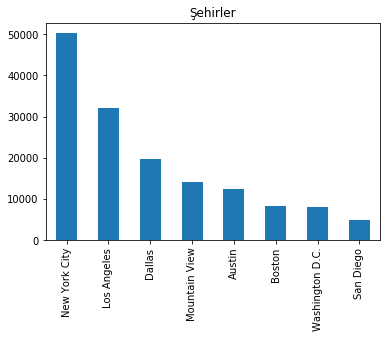

In [25]:
data_set['sehir'].value_counts().plot.bar().set_title("Şehirler");

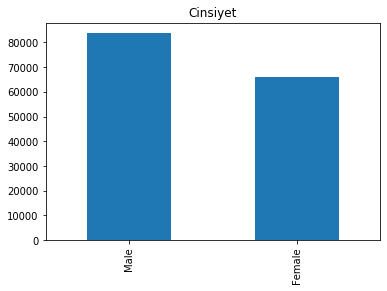

In [26]:
data_set['cinsiyet'].value_counts().plot.bar().set_title("Cinsiyet");

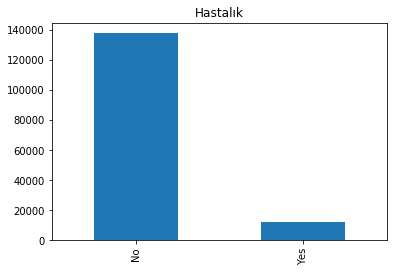

In [27]:
data_set['hastalık'].value_counts().plot.bar().set_title("Hastalık");

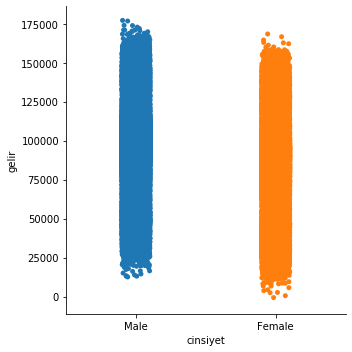

In [28]:
sns.catplot(x = 'cinsiyet', y = 'gelir',data = data_set);

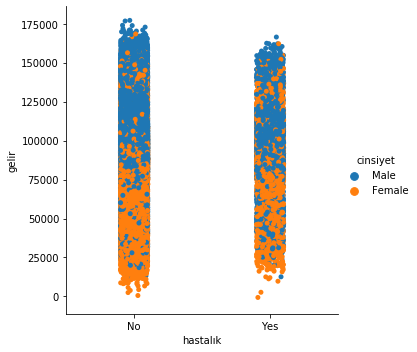

In [29]:
sns.catplot(x = 'hastalık',y = 'gelir',hue = 'cinsiyet',data = data_set);

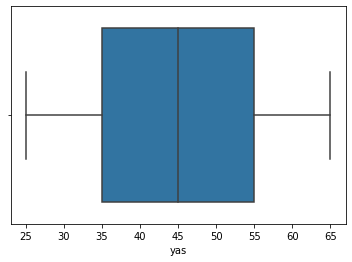

In [30]:
sns.boxplot(x = data_set.yas);

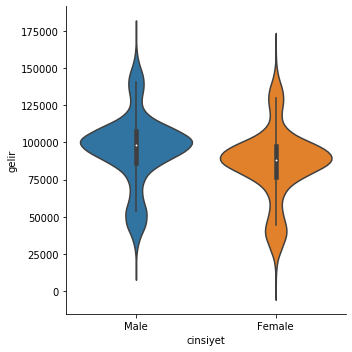

In [31]:
sns.catplot(x = 'cinsiyet',y = 'gelir',kind = 'violin',data = data_set);

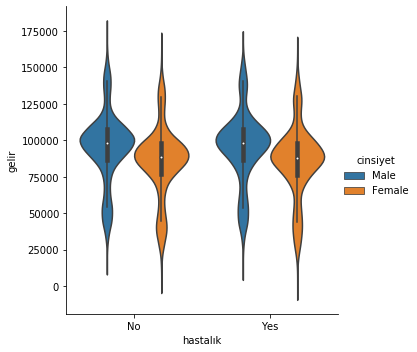

In [32]:
sns.catplot(x = 'hastalık', y = 'gelir',hue = 'cinsiyet',kind = 'violin',data = data_set);